# importing lib

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [37]:
%pip install klib


Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
train_data = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv', nrows=10000)
test_data = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv', nrows=10000)
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [41]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


# #PREPROCESSING THE DATA


In [42]:
import klib
# Clean the column names, drop missing values, and convert data types

train_data['PRODUCT_TYPE_ID'].fillna(train_data['PRODUCT_TYPE_ID'].mode()[0], inplace=True)

In [43]:
import klib
# Clean the column names, drop missing values, and convert data types
train_data= klib.clean_column_names(train_data)
train_data= klib.drop_missing(train_data)
train_data = klib.convert_datatypes(train_data)

# Check for duplicates and remove them
train_data = train_data.drop_duplicates()

test_data = klib.clean_column_names(test_data)
test_data = klib.drop_missing(test_data)
test_data = klib.convert_datatypes(test_data)

# Check for duplicates and remove them
test_data = test_data.drop_duplicates()



In [44]:
train_data.isnull().sum()

product_id            0
title                 0
bullet_points      3700
description        5176
product_type_id       0
product_length        0
dtype: int64

In [45]:
# Fill missing values with 'None'
train_data.fillna(value='None', inplace=True)

# Drop remaining NaN values
train_data.dropna(inplace=True)


In [46]:

test_data.fillna(value='None', inplace=True)

# Drop remaining NaN values
test_data.dropna(inplace=True)


In [47]:
train_data.isnull().sum()

product_id         0
title              0
bullet_points      0
description        0
product_type_id    0
product_length     0
dtype: int64

In [48]:
# print shape of train and test data
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (10000, 6)
Test Data Shape: (10000, 5)


In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

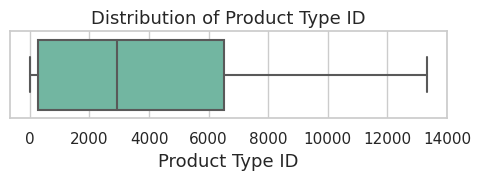

In [50]:
import seaborn as sns

sns.set(style="whitegrid", rc={"font.size": 13, "axes.labelsize": 13})
plt.figure(figsize=(5, 2))

ax = sns.boxplot(x='product_type_id', data=train_data, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Product Type ID')
plt.title("Distribution of Product Type ID", fontsize=13)
plt.tight_layout(h_pad=3)


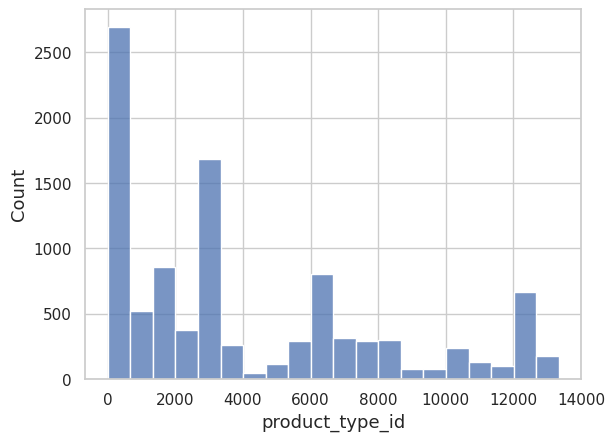

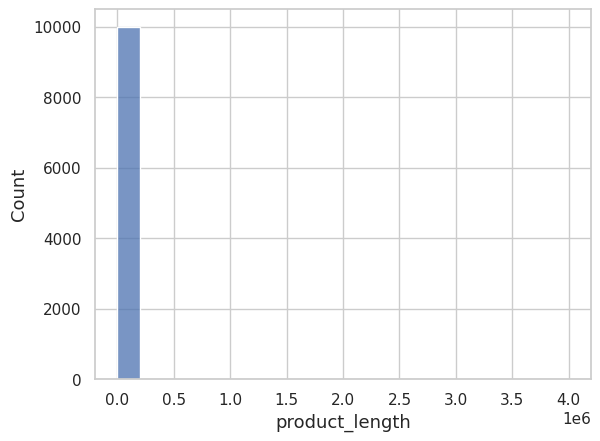

In [51]:
# Histogram of product_type_id
sns.histplot(data=train_data, x='product_type_id', bins=20)
plt.show()

# Histogram of product_length
sns.histplot(data=train_data, x='product_length', bins=20)
plt.show()


In [52]:
print(train_data['product_length'].describe())
#there seems to be outliers in this column

count    1.000000e+04
mean     1.650626e+03
std      4.047295e+04
min      1.000000e+00
25%      5.027500e+02
50%      6.500000e+02
75%      1.023622e+03
max      3.996600e+06
Name: product_length, dtype: float64


In [53]:
# Transform the product length column using the natural logarithm function
train_data['product_length'] = np.log1p(train_data['product_length'])


In [55]:
# Calculate the Q1 and Q3 quartiles
Q1 = train_data['product_length'].quantile(0.25)
Q3 = train_data['product_length'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Count the number of outliers
outliers = train_data[(train_data['product_length'] > upper_bound) | (train_data['product_length'] < lower_bound)]
print("Number of outliers removed:", len(outliers))


Number of outliers removed: 1202


# TEXT PROCESSING 
## Concat Title , discription , bulletpoints into Text

In [56]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the stopwords and the Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def process_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Return the list of tokens
    return tokens


# Concatenate the 'TITLE', 'BULLET_POINTS', and 'DESCRIPTION' columns into a new 'text' column
train_data['text'] = train_data[['title', 'bullet_points', 'description']].apply(lambda x: ' '.join(x), axis=1)

# Apply the preprocess_text function to the 'text' column and replace the original text with the list of tokens
train_data['text'] = train_data['text'].apply(process_text)

# Concatenate the 'TITLE', 'BULLET_POINTS', and 'DESCRIPTION' columns into a new 'text' column
test_data['text'] = test_data[['title', 'bullet_points', 'description']].apply(lambda x: ' '.join(x), axis=1)

# Apply the preprocess_text function to the 'text' column and replace the original text with the list of tokens
test_data['text'] = test_data['text'].apply(process_text)






In [57]:
train_data.drop(['title', 'bullet_points', 'description'], axis=1, inplace=True)
test_data.drop(['title', 'bullet_points', 'description'], axis=1, inplace=True)


In [59]:
train_data.describe()

,product_id,product_type_id,product_length
count,1.000000e+04,10000.000000,10000.000000
mean,1.495725e+06,4024.644000,6.533531
std,8.584426e+05,3954.871315,0.990913
min,5.100000e+02,0.000000,0.693147
25%,7.639112e+05,284.750000,6.222080
50%,1.490764e+06,2917.000000,6.478510
75%,2.228138e+06,6519.000000,6.932079
max,2.999883e+06,13343.000000,15.200955


In [60]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [61]:
import bs4
import re
from bs4 import BeautifulSoup

def cleanhtml(raw_html):
    if isinstance(raw_html, str):
        cleanr = re.compile('<.*?>')
        cleantext = BeautifulSoup(raw_html, "html.parser").text
        cleantext = re.sub(cleanr, '', cleantext)
        return cleantext
    else:
        return raw_html
    
def encode_decode(text):
    # Encode the text into ASCII and ignore errors
    encoded = text.encode('ascii', 'ignore').decode('utf-8')
    
    # Normalize the text to remove any non-standard characters
    normalized = unicodedata.normalize('NFKD', encoded)
    
    # Return the normalized text
    return normalized

import re

def regexx(text):
    # Remove any special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def apos(text):
    text = text.replace("'", "\"")
    return text


def split(text):
    # Split the text into a list of words
    words = text.split()
    
    # Join the words back together with a single space between each word
    return ' '.join(words)

In [62]:
import re
import unicodedata
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



# Clean the HTML tags from the 'text' column
train_data["text"] = train_data["text"].apply(cleanhtml)
test_data["text"] = test_data["text"].apply(cleanhtml)

train_data['text'] = train_data['text'].apply(lambda x: ' '.join(x))
test_data['text'] = test_data['text'].apply(lambda x: ' '.join(x))

# Encode and decode the 'text' column to remove any non-standard characters
train_data["text"] = train_data["text"].apply(encode_decode)
test_data["text"] = test_data["text"].apply(encode_decode)

# Remove any remaining non-alphanumeric characters and extra whitespace
train_data["text"] = train_data["text"].apply(regexx)
test_data["text"] = test_data["text"].apply(regexx)

# Replace apostrophes with their full words
train_data["text"] = train_data["text"].apply(apos)
test_data["text"] = test_data["text"].apply(apos)


In [63]:
train_data

,product_id,product_type_id,product_length,text
0,1925202,1650,7.662458,artzfolio tulip flower blackout curtain door w...
1,2673191,2755,5.978126,mark spencer girl pyjama set t862561cnavy mix9...
2,2765088,7537,6.618781,priknik horn red electric air horn compressor ...
3,1594019,2996,6.670008,alishah woman cotton ankle length legging comb...
4,283658,6112,6.395969,united empire loyalist chronicle great migrati...
...,...,...,...,...
9995,305033,6054,6.421622,modern law partnership including full consider...
9996,2477776,3077,6.564788,diaz womensgirls super soft round neck full sl...
9997,2606423,8198,1.596758,sanavya universal gas geyser spare part househ...
9998,1598688,0,7.003974,june tailor jt1458 quilt asgo tablerunner veni...


In [64]:
test_data

,product_id,product_type_id,text
0,604373,6142,manuel dhliogravure et de photogravure en reli...
1,1729783,1622,dcgaring microfiber throw blanket warm fuzzy p...
2,1871949,7540,imatch auto part front license plate bracket t...
3,1107571,12442,pinmart gold plated excellence service 1 year ...
4,624253,6318,visual mathematics illustrated ti92 ti89 none ...
...,...,...,...
9995,461169,146,trend optical material none none
9996,907904,3297,birkenstock unisex adult madrid open toe birko...
9997,160397,112,medieval future attitude future middle age non...
9998,624381,1,la france de faits diver 200 histoires insolit...


In [65]:
train_data['text'].describe()


count         10000
unique         9995
top       none none
freq              3
Name: text, dtype: object

In [66]:
train_data['text'].nunique()


9995

In [67]:
# since there are unique values checking for duplicates and if these are genuine 
# Find the duplicate rows based on the 'text' column
duplicates = train_data[train_data.duplicated(subset=['text'], keep=False)]

# Group the duplicate rows by their 'text' values
duplicates_grouped = duplicates.groupby('text')

# Loop through the groups and print the rows that have different features
for text, group in duplicates_grouped:
    if len(group['product_id'].unique()) > 1 or len(group['product_type_id'].unique()) > 1 or len(group['product_length'].unique()) > 1:
        print(f"Non-genuine duplicate rows for text '{text}':")
        print(group)


Non-genuine duplicate rows for text 'ceremony none none':
      product_id  product_type_id  product_length                text
5480     1141711                7        6.311735  ceremony none none
9220       72091              103        6.552508  ceremony none none
Non-genuine duplicate rows for text 'dirty magic none none':
      product_id  product_type_id  product_length                   text
6986       60384               44        6.378426  dirty magic none none
7572       60385               41        6.278521  dirty magic none none
Non-genuine duplicate rows for text 'honey none none':
      product_id  product_type_id  product_length             text
902       522185               97        6.216606  honey none none
1851      845789              837        6.354370  honey none none
Non-genuine duplicate rows for text 'none none':
      product_id  product_type_id  product_length       text
4122      873162              829        6.265301  none none
7984      178038         

In [68]:
#dups are not genuine and can be dropped 
train_data.drop_duplicates(subset=['text'], keep='first', inplace=True)


In [70]:
train_data['text'].describe()


count                                                  9995
unique                                                 9995
top       artzfolio tulip flower blackout curtain door w...
freq                                                      1
Name: text, dtype: object

In [71]:
test_data['text'].describe()


count                       10000
unique                       9993
top       unknown title none none
freq                            3
Name: text, dtype: object

In [73]:
test_data[test_data.duplicated(['text'], keep=False)].sort_values(by=['text'])
#it has duplicate value 


,product_id,product_type_id,text
6714,2301751,12064,casotec back cover samsung galaxy m42 5g plast...
9532,2301736,12556,casotec back cover samsung galaxy m42 5g plast...
227,2808150,10319,gloy 3 seater sofa cover cotton polyester feat...
7892,2805907,10319,gloy 3 seater sofa cover cotton polyester feat...
1274,415451,114,none none
8130,811580,811,none none
9201,886366,804,none none
3861,416001,100,unknown title none none
4086,717143,0,unknown title none none
7095,505645,86,unknown title none none


In [75]:
test_data.drop_duplicates(subset=['text'], keep='first', inplace=True)


In [76]:
train_data['text'].describe()


count                                                  9995
unique                                                 9995
top       artzfolio tulip flower blackout curtain door w...
freq                                                      1
Name: text, dtype: object

## # Perform one-hot encoding on product_type_id column


In [77]:
# Perform one-hot encoding on product_type_id column
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit label encoder and transform the product_type_id column
train_data['product_type_id'] = le.fit_transform(train_data['product_type_id'])
test_data['product_type_id'] = le.fit_transform(test_data['product_type_id'])


In [78]:
print(train_data['product_type_id'].info())
print(train_data['product_type_id'].describe())
print(train_data['product_type_id'].unique())

print(test_data['product_type_id'].info())
print(test_data['product_type_id'].describe())
print(test_data['product_type_id'].unique())


<class 'pandas.core.series.Series'>
Int64Index: 9995 entries, 0 to 9999
Series name: product_type_id
Non-Null Count  Dtype
--------------  -----
9995 non-null   int64
dtypes: int64(1)
memory usage: 156.2 KB
None
count    9995.000000
mean      916.265433
std       719.129018
min         0.000000
25%       173.000000
50%       869.000000
75%      1500.000000
max      2318.000000
Name: product_type_id, dtype: float64
[ 578  798 1647 ... 1470  659 1760]
<class 'pandas.core.series.Series'>
Int64Index: 9993 entries, 0 to 9999
Series name: product_type_id
Non-Null Count  Dtype
--------------  -----
9993 non-null   int64
dtypes: int64(1)
memory usage: 156.1 KB
None
count    9993.000000
mean      885.443410
std       694.130851
min         0.000000
25%       147.000000
50%       866.000000
75%      1410.000000
max      2248.000000
Name: product_type_id, dtype: float64
[1345  557 1612 ... 1291 1068 2241]


In [79]:
train_data.to_csv("preprocessed.csv",index=False)


In [80]:
test_data.to_csv("preprocessed.csv",index=False)
